<a href="https://colab.research.google.com/github/Aleena24/SpeechProcessing/blob/main/speech_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os
import librosa
from scipy.signal import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the dataset directory
dataset_path = "/content/drive/MyDrive/timit"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.listdir(dataset_path))

['README', 'allfilelist.txt', 'allphonelist.txt', 'allphonedur.txt', 'allsentime.txt', 'allsenlist.txt', 'allphonetime.txt', 'phoncode.doc', 'l', 'prompts.txt', 'readme.doc', 'sentences', 'sentences.pos', 'sentences.tags', 'sentences.ppp', 'spkrinfo.txt', 'spkrsent.txt', 'timitdic.doc', 'testset.doc', 'wrdalign.timit', 'timitdic.txt', 'dr4-maeb0', 'dr6-fapb0', 'dr5-mbgt0', 'dr8-mbcg0', 'dr7-madd0', 'dr7-fblv0', 'dr4-falr0', 'dr6-mbma1', 'dr5-ftlg0', 'dr8-fbcg1', 'dr3-madc0', 'dr2-faem0', 'dr1-fvmh0', 'dr2-marc0', 'dr3-falk0', 'dr1-mcpm0']


In [ ]:
# Load the original speech signal from TIMIT dataset
file_path = "/content/drive/MyDrive/timit/dr1-fvmh0/sa1.wav"
original_signal, original_sr = librosa.load(file_path, sr=None)
print(f"Original Sampling Rate: {original_sr} Hz")


Original Sampling Rate: 16000 Hz


1. Plot the Time Domain Representation of the Original Speech Signal

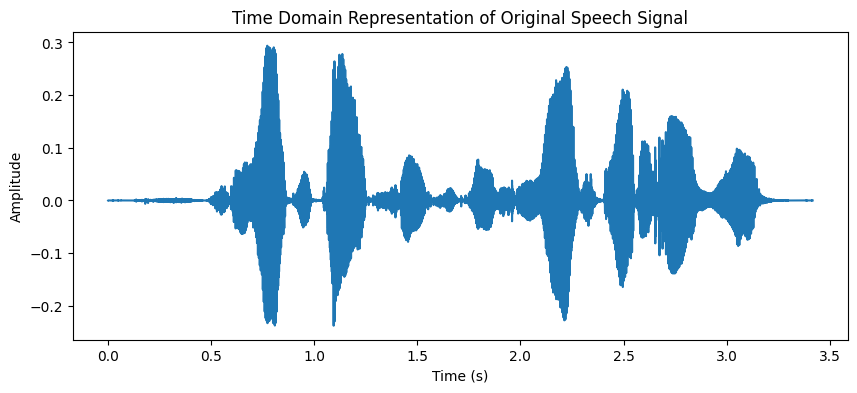

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(original_signal)/original_sr, len(original_signal)), original_signal)
plt.title("Time Domain Representation of Original Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

2. Sample the Speech Signal at Different Sampling Rates

In [ ]:
def resample_signal_scipy(signal, orig_sr, target_sr):
    num_samples = int(len(signal) * target_sr / orig_sr)
    return resample(signal, num_samples)


In [ ]:
sampling_rates = [8000, 16000, 44100]
sampled_signals = {sr: resample_signal_scipy(original_signal, original_sr, sr) for sr in sampling_rates}

3. Plot the Sampled Signals

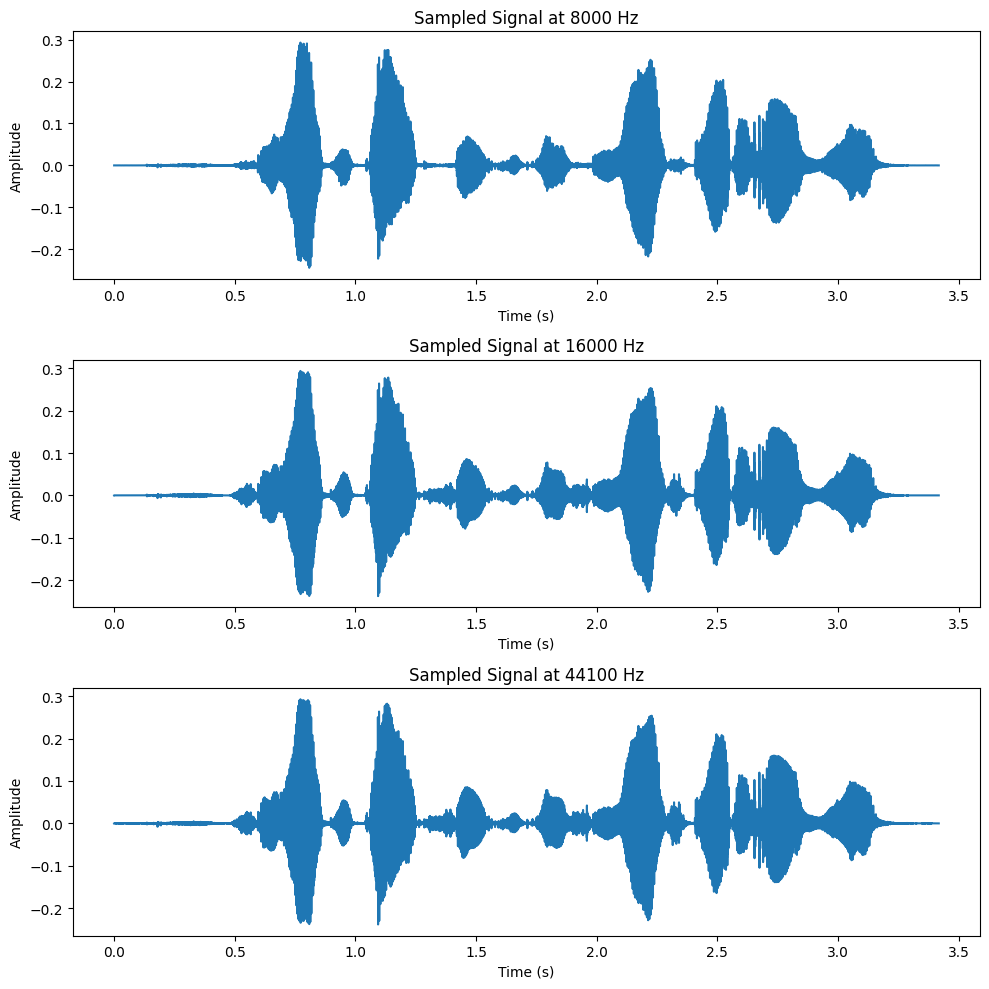

In [ ]:
fig, axes = plt.subplots(len(sampling_rates), 1, figsize=(10, 10))
for i, sr in enumerate(sampling_rates):
    time = np.linspace(0, len(sampled_signals[sr]) / sr, len(sampled_signals[sr]))
    axes[i].plot(time, sampled_signals[sr])
    axes[i].set_title(f"Sampled Signal at {sr} Hz")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

4.  Reconstruct the Signal Using Interpolation Methods

a. Zero-Order Hold (Nearest-Neighbor Interpolation)



In [ ]:
print(f"Original Signal Length: {len(original_signal)}")
print(f"Reconstructed Length at 44.1kHz: {len(reconstructed_signals_zo[44100])}")


Original Signal Length: 54682
Reconstructed Length at 44.1kHz: 54681


In [ ]:
def zero_order_hold(signal, orig_sr, target_sr):
    """Reconstruct signal using zero-order hold interpolation."""
    num_samples = int(len(signal) * target_sr / orig_sr)
    return np.repeat(signal, np.ceil(num_samples / len(signal)).astype(int))[:num_samples]


In [ ]:
# Assuming sampled_signals already computed
reconstructed_signals_zo = {sr: zero_order_hold(sampled_signals[sr], sr, original_sr) for sr in sampling_rates}


In [ ]:
print("Reconstructed Signal at 44.1 kHz (first 10 samples):")
print(reconstructed_signals_zo[44100][:10])


Reconstructed Signal at 44.1 kHz (first 10 samples):
[-3.0526506e-05  1.3537634e-05  8.4093277e-05  1.2782312e-04
  1.1356723e-04  5.8705125e-05  1.1561432e-05  8.6660511e-06
  4.7420548e-05  9.5724055e-05]


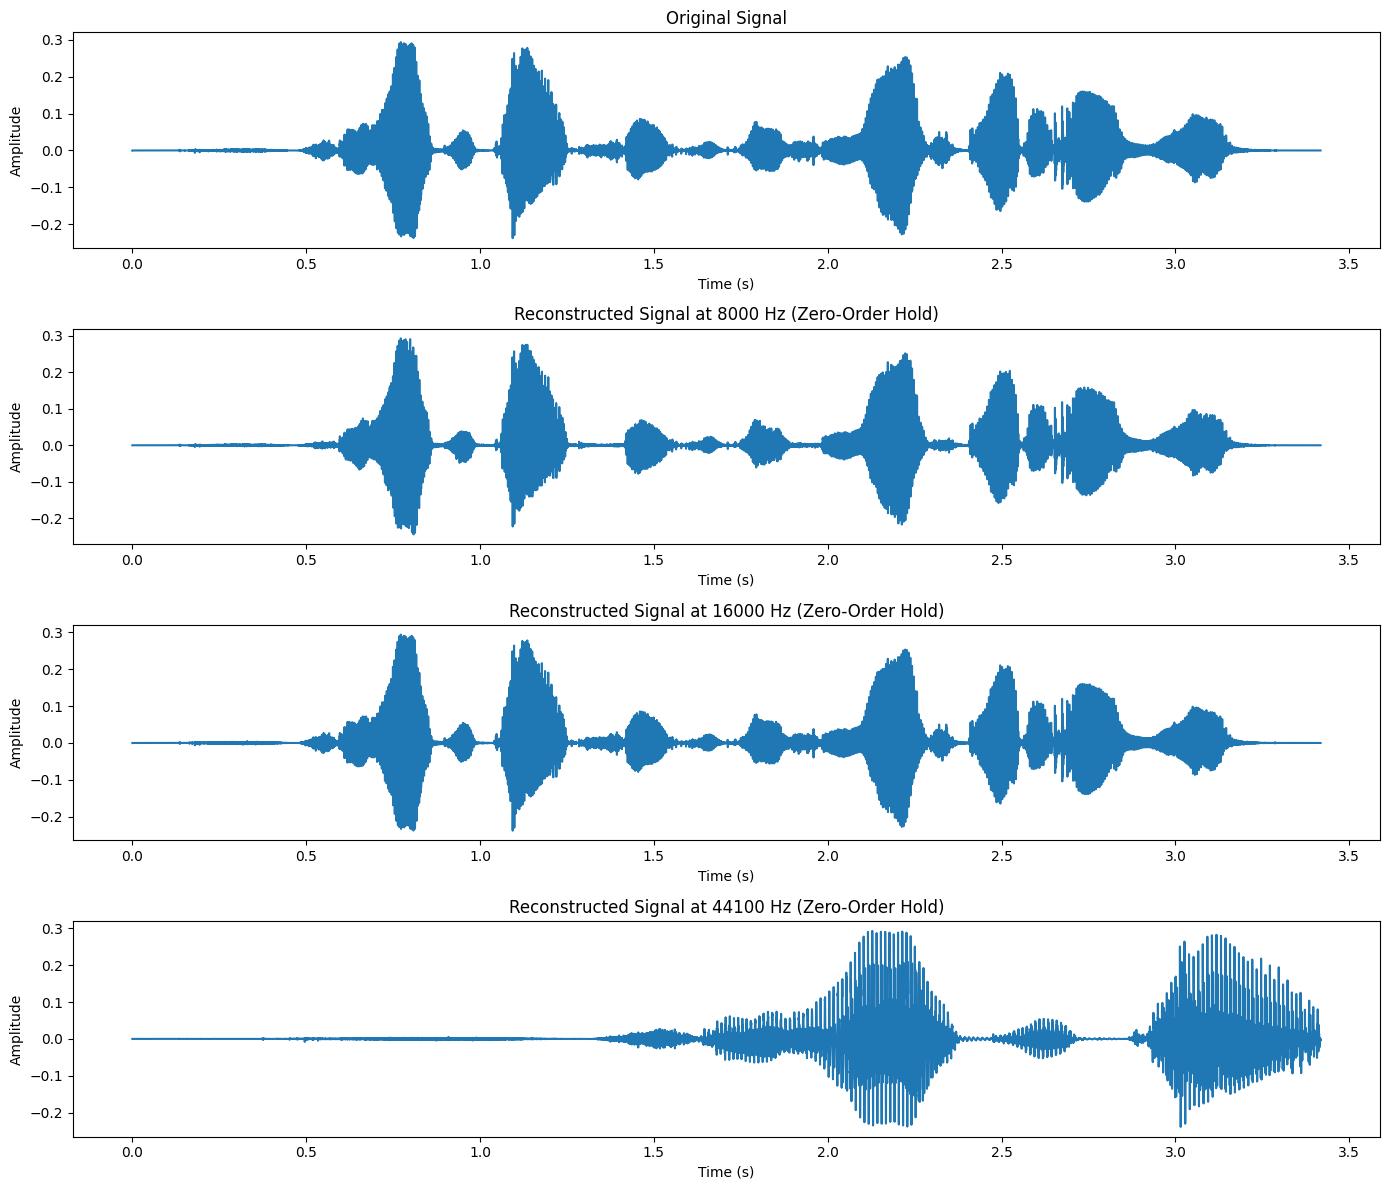

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_time_vector(signal, sr):
    return np.linspace(0, len(signal) / sr, len(signal))

# Plot original and reconstructed signals
plt.figure(figsize=(14, 12))

# Plot original signal
plt.subplot(len(sampling_rates) + 1, 1, 1)
plt.plot(get_time_vector(original_signal, original_sr), original_signal)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot reconstructed signals using Zero-Order Hold
for i, sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates) + 1, 1, i + 2)
    time_vector = get_time_vector(reconstructed_signals_zo[sr], original_sr)
    plt.plot(time_vector, reconstructed_signals_zo[sr])
    plt.title(f"Reconstructed Signal at {sr} Hz (Zero-Order Hold)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


b.Linear Interpolation

In [ ]:
def linear_interpolation(signal, orig_sr, target_sr):
    """Reconstruct signal using linear interpolation."""
    num_samples = int(len(signal) * target_sr / orig_sr)
    return np.interp(np.linspace(0, len(signal), num_samples), np.arange(len(signal)), signal)

reconstructed_signals_li = {sr: linear_interpolation(sampled_signals[sr], sr, original_sr) for sr in sampling_rates}


In [ ]:
def linear_interpolation(signal, orig_sr, target_sr):
    """Reconstruct signal using linear interpolation."""
    num_samples = int(len(signal) * target_sr / orig_sr)
    return np.interp(np.linspace(0, len(signal) - 1, num_samples), np.arange(len(signal)), signal)


In [ ]:
reconstructed_signals_li = {sr: linear_interpolation(sampled_signals[sr], sr, original_sr) for sr in sampling_rates}

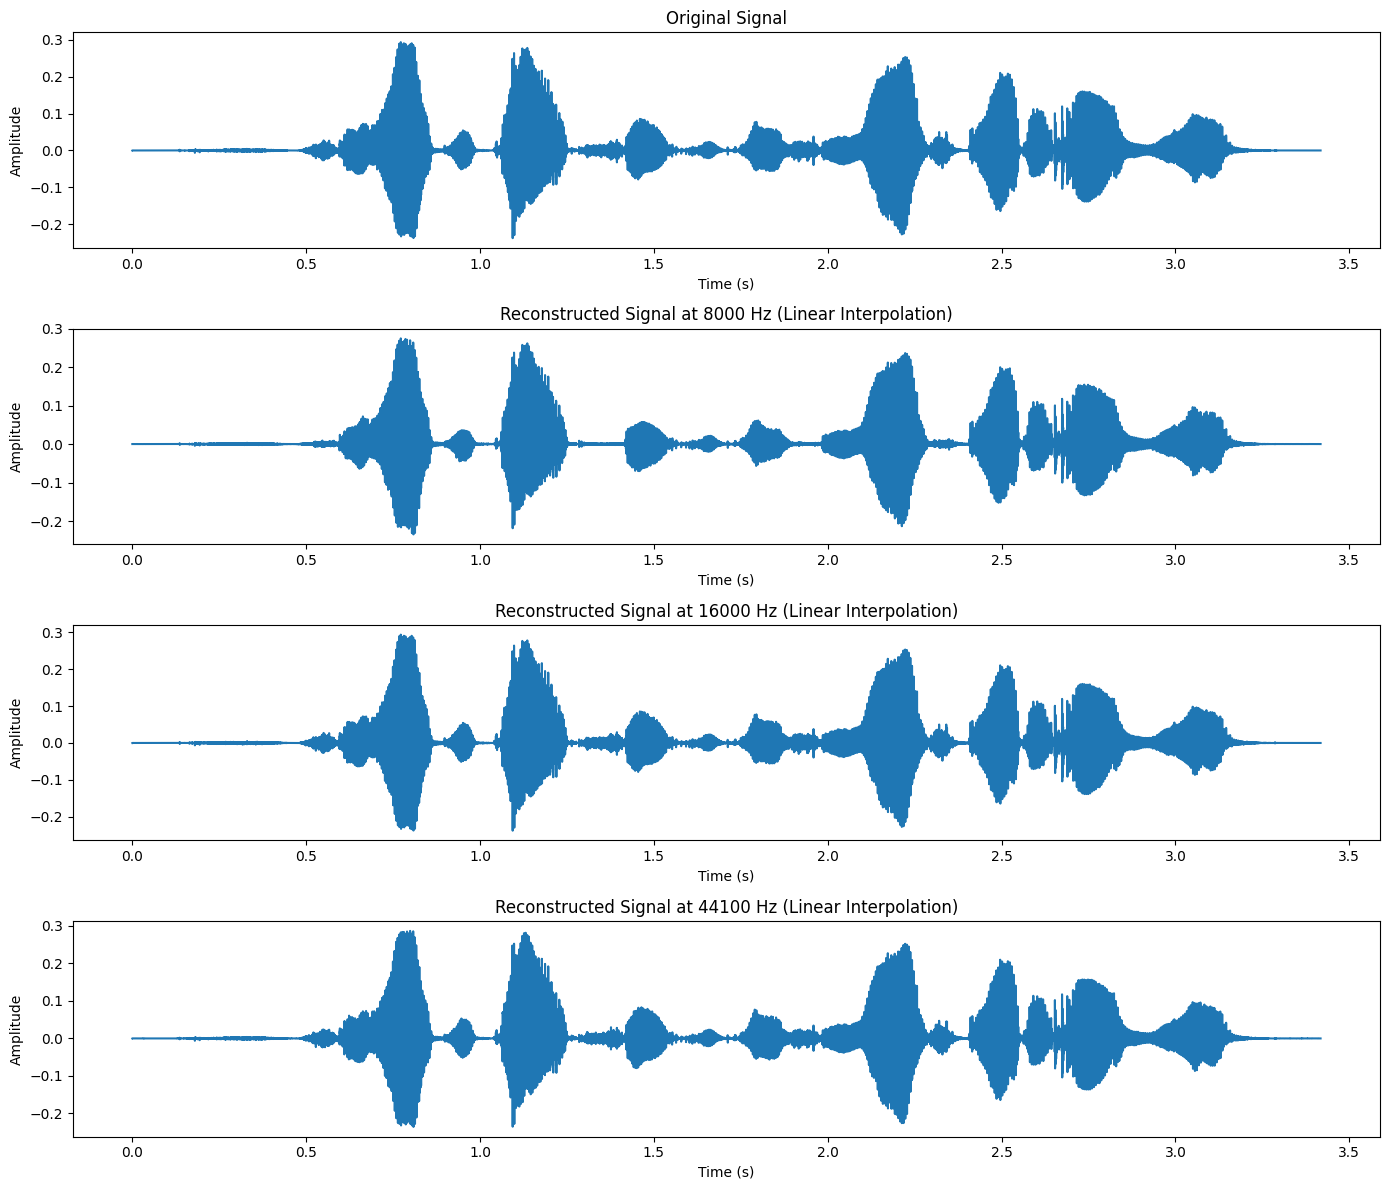

In [ ]:
def get_time_vector(signal, sr):
    return np.linspace(0, len(signal) / sr, len(signal))

# Plot original and reconstructed signals
plt.figure(figsize=(14, 12))

# Plot original signal
plt.subplot(len(sampling_rates) + 1, 1, 1)
plt.plot(get_time_vector(original_signal, original_sr), original_signal)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot reconstructed signals using Linear Interpolation
for i, sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates) + 1, 1, i + 2)
    time_vector = get_time_vector(reconstructed_signals_li[sr], original_sr)
    plt.plot(time_vector, reconstructed_signals_li[sr])
    plt.title(f"Reconstructed Signal at {sr} Hz (Linear Interpolation)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


5. Calculate Mean Squared Error (MSE) Between the Original and Reconstructed Signals

In [ ]:
# Calculate MSE for Zero-Order Hold
mse_zo = {sr: mean_squared_error(original_signal[:len(reconstructed_signals_zo[sr])],
                                 reconstructed_signals_zo[sr]) for sr in sampling_rates}

# Calculate MSE for Linear Interpolation
mse_li = {sr: mean_squared_error(original_signal[:len(reconstructed_signals_li[sr])],
                                 reconstructed_signals_li[sr]) for sr in sampling_rates}

# Print MSE results
for sr in sampling_rates:
    print(f"Sampling Rate: {sr} Hz")
    print(f"Mean Squared Error (Zero-Order Hold): {mse_zo[sr]:.6f}")
    print(f"Mean Squared Error (Linear Interpolation): {mse_li[sr]:.6f}\n")


Sampling Rate: 8000 Hz
Mean Squared Error (Zero-Order Hold): 0.000093
Mean Squared Error (Linear Interpolation): 0.000060

Sampling Rate: 16000 Hz
Mean Squared Error (Zero-Order Hold): 0.000000
Mean Squared Error (Linear Interpolation): 0.000000

Sampling Rate: 44100 Hz
Mean Squared Error (Zero-Order Hold): 0.003036
Mean Squared Error (Linear Interpolation): 0.000141



In [ ]:
# Calculate MSE for Zero-Order Hold
mse_zo = {sr: mean_squared_error(original_signal[:len(reconstructed_signals_zo[sr])],
                                 reconstructed_signals_zo[sr]) for sr in sampling_rates}

# Calculate MSE for Linear Interpolation
mse_li = {sr: mean_squared_error(original_signal[:len(reconstructed_signals_li[sr])],
                                 reconstructed_signals_li[sr]) for sr in sampling_rates}


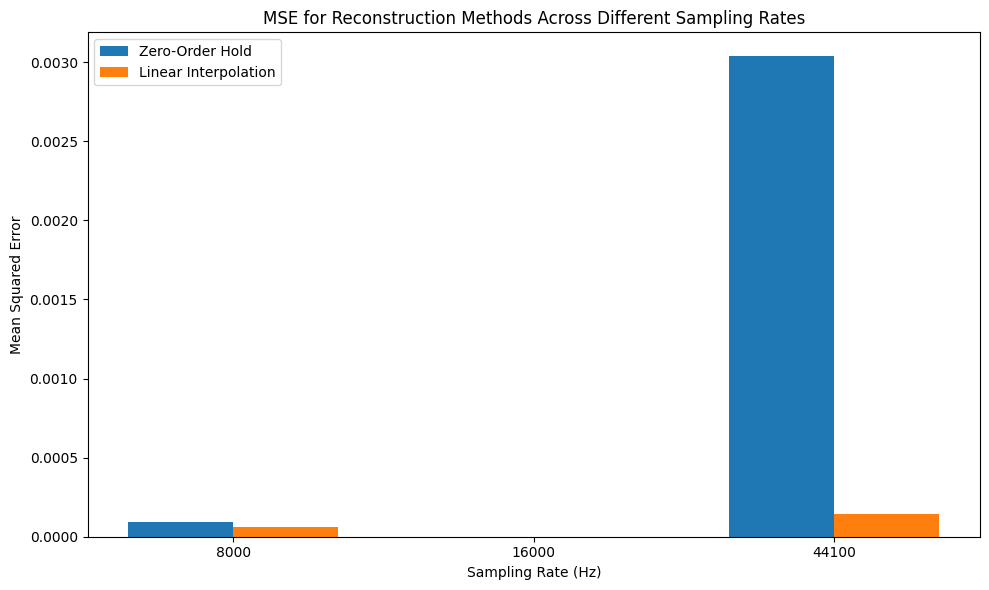

In [ ]:
sampling_rates = sorted(sampling_rates)

mse_values_zo = [mse_zo[sr] for sr in sampling_rates]
mse_values_li = [mse_li[sr] for sr in sampling_rates]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(sampling_rates))

plt.bar(index, mse_values_zo, bar_width, label='Zero-Order Hold')
plt.bar(index + bar_width, mse_values_li, bar_width, label='Linear Interpolation')

plt.xlabel('Sampling Rate (Hz)')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Reconstruction Methods Across Different Sampling Rates')
plt.xticks(index + bar_width / 2, sampling_rates)
plt.legend()

plt.tight_layout()
plt.show()
